In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_raw = pd.read_csv("/workspaces/Daily-Climate-time-series-data/data/DailyDelhiClimateTrain.csv", parse_dates=['date'])
df_raw.set_index('date', inplace=True)
df_raw.sort_index(inplace=True)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [3]:
df_raw.sample(15,random_state=2025)

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2016-07-06,33.266667,64.066667,8.878571,996.866667
2014-08-27,33.857143,44.714286,8.112500,1001.125000
2013-04-26,29.875000,45.875000,6.712500,1008.375000
2016-12-07,18.250000,74.350000,0.925000,1017.421053
2016-12-27,16.850000,67.550000,8.335000,1017.200000
2013-09-10,29.666667,66.333333,3.700000,1005.333333
2016-11-25,23.600000,30.550000,15.085000,1012.950000
2016-04-24,31.312500,22.125000,10.187500,1003.062500
2015-07-13,29.875000,73.125000,4.862500,1000.625000


In [4]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
meantemp,1462.0,25.495521,7.348103,6.000000,18.857143,27.714286,31.305804,38.714286
humidity,1462.0,60.771702,16.769652,13.428571,50.375000,62.625000,72.218750,100.000000
wind_speed,1462.0,6.802209,4.561602,0.000000,3.475000,6.221667,9.238235,42.220000
meanpressure,1462.0,1011.104548,180.231668,-3.041667,1001.580357,1008.563492,1014.944901,7679.333333


## Preprocessing


In [5]:
df = df_raw.copy()

## EDA

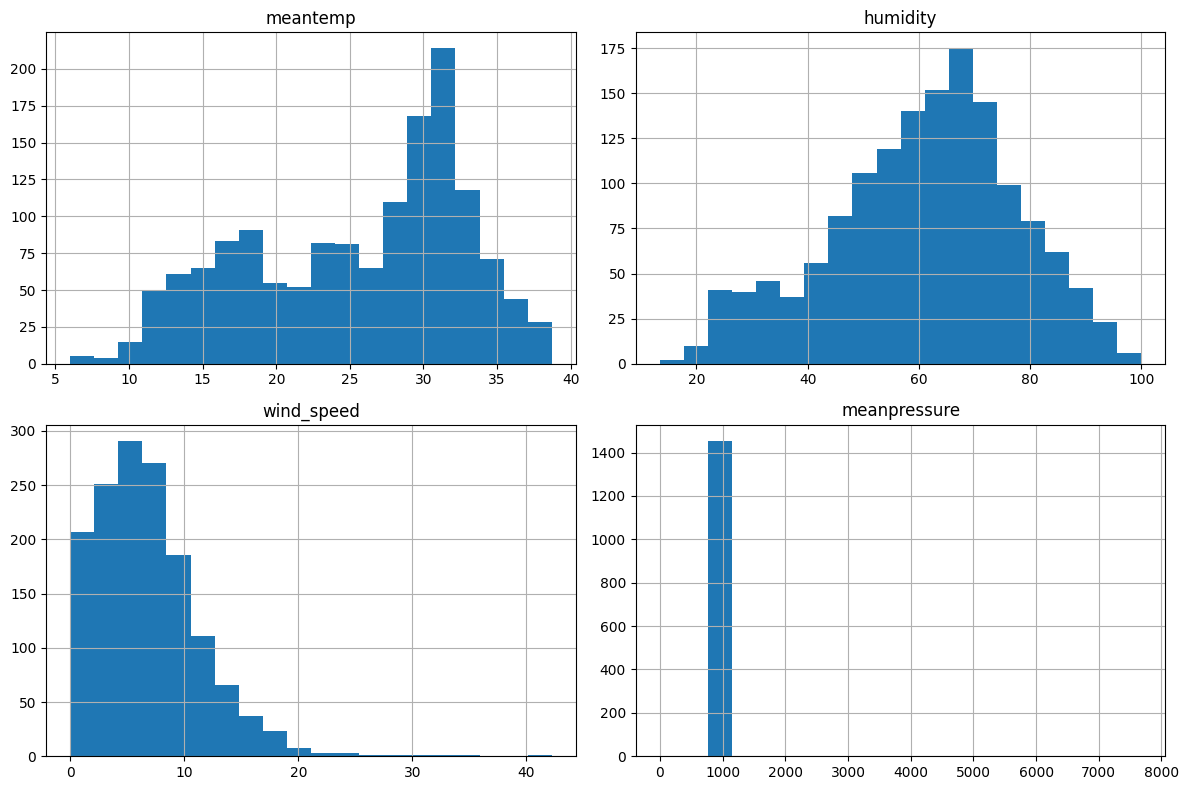

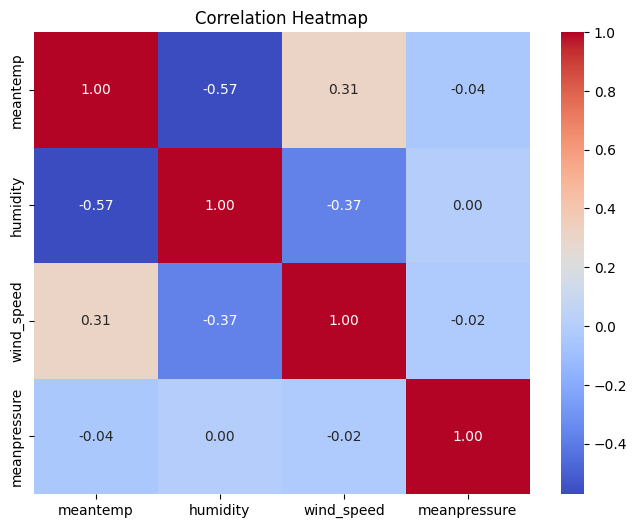

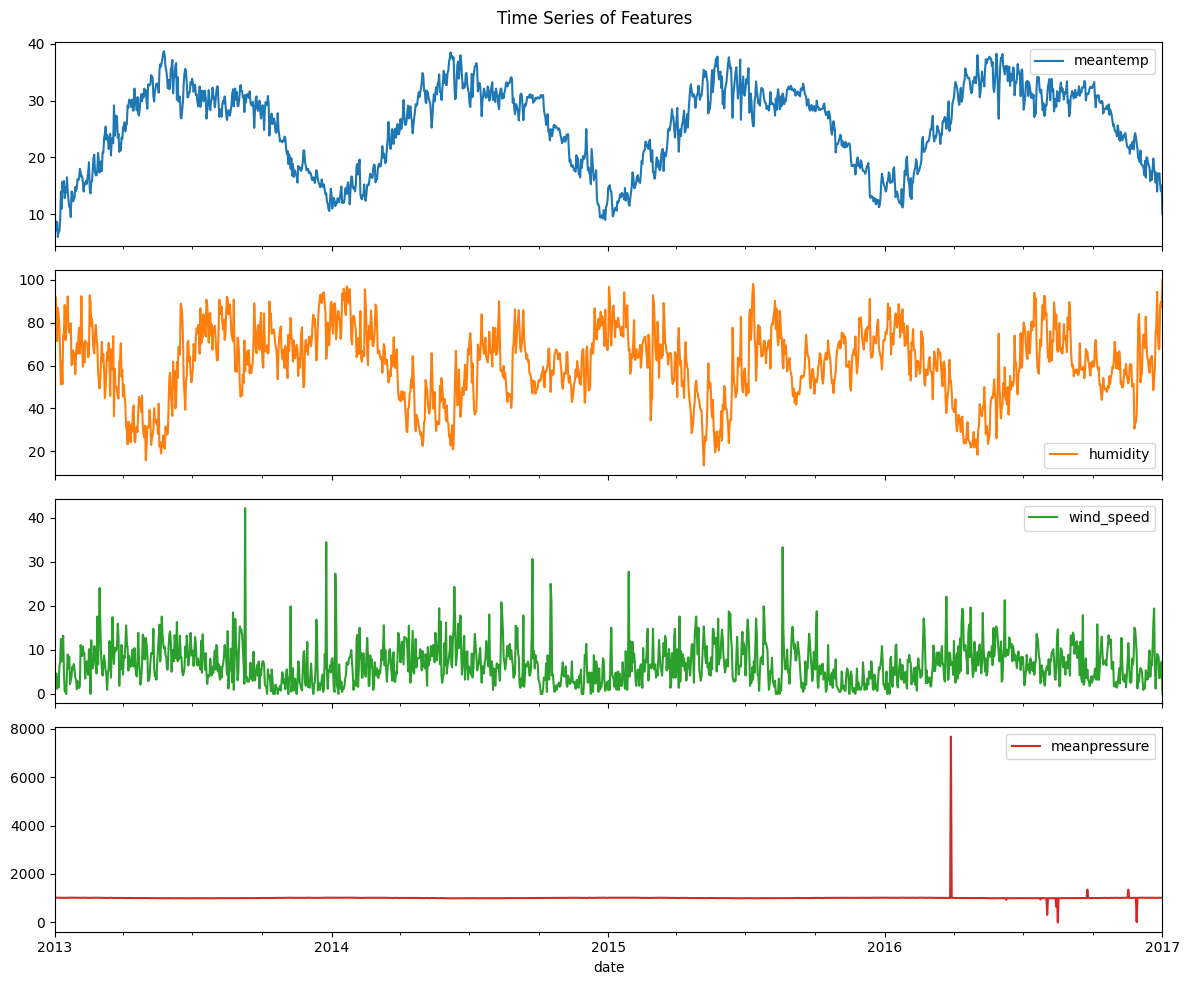

In [6]:
# Distribution of each feature
df.hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Time series plot for each feature
df.plot(subplots=True, figsize=(12, 10), title="Time Series of Features")
plt.tight_layout()
plt.show()

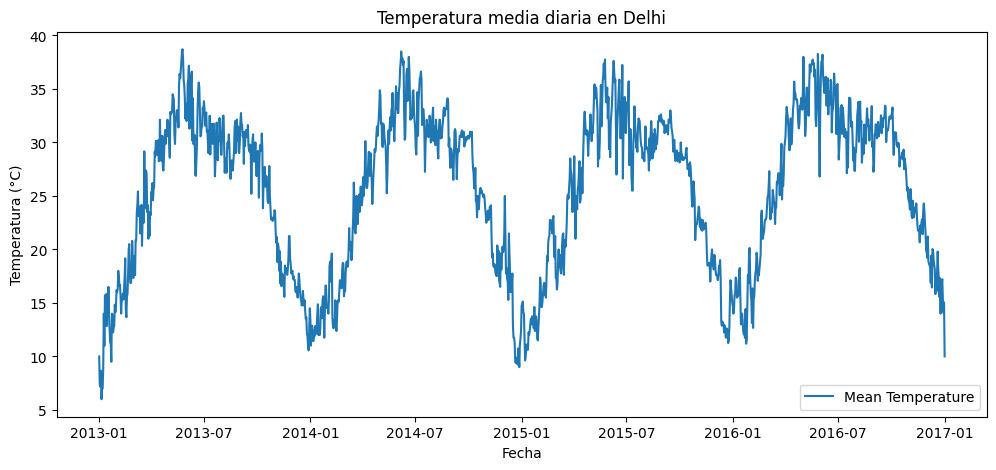

In [7]:
plt.figure(figsize=(12,5))
plt.plot(df['meantemp'], label='Mean Temperature')
plt.title("Temperatura media diaria en Delhi")
plt.xlabel("Fecha")
plt.ylabel("Temperatura (°C)")
plt.legend()
plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['meantemp'].dropna())
print("p-value:", result[1])

p-value: 0.2774121372301602


In [9]:
df['diff'] = df['meantemp'].diff()

## Entrenar modelo ARIMA

/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


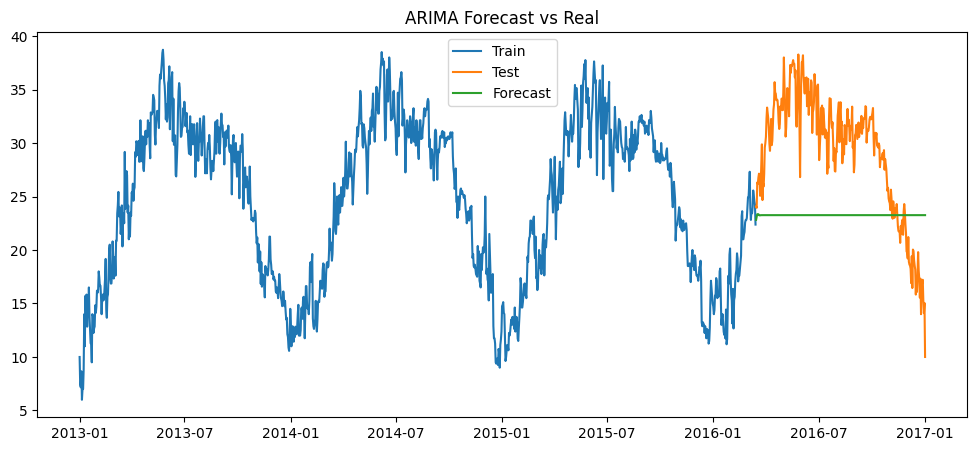

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Divide el conjunto en train y test (80% train)
train_size = int(len(df) * 0.8)
train, test = df['meantemp'][:train_size], df['meantemp'][train_size:]

# Entrena el modelo
model = ARIMA(train, order=(5,1,0))  # Puedes ajustar los parámetros p,d,q
model_fit = model.fit()

# Pronóstico
forecast = model_fit.forecast(steps=len(test))
forecast.index = test.index

# Gráfica comparativa
plt.figure(figsize=(12,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(forecast.index, forecast, label='Forecast')
plt.legend()
plt.title("ARIMA Forecast vs Real")
plt.show()

* Línea azul (Train): muestra los datos de entrenamiento de temperatura diaria desde 2013 hasta principios de 2016. Se observan patrones estacionales claros (ciclos anuales).

* Línea naranja (Test): muestra los datos reales del conjunto de prueba (temperaturas observadas entre 2016 y 2017). Se mantiene la estacionalidad, aunque con ligeras variaciones.

* Línea verde (Forecast): muestra las predicciones hechas por el modelo ARIMA sobre el conjunto de test. Aquí se observa un gran defecto del modelo: predice una línea casi plana, lo que significa que no ha captado bien ni la tendencia ni la estacionalidad.